# Visualisations

On va apprendre à utiliser Jupyter notebook pour faire de la programmation en Python, mais aussi pour faire des analyses de données et des visualisations.  
Les analyses de données et les visualisations sont des outils très utiles pour comprendre les données et pour communiquer des résultats.
Le job qui est très en vogue en ce moment est le job de *Data Scientist*, en français *analyseuse de données*. Beaucoup d'entreprises ont besoin d'ingénieures qui pourront analyser les données de leurs clients. Un exemple serait, combien de personnes achètent quatre pots d'Ovomaltine par mois. 
Ces analyses pourraient permettre à l'entreprise de chocolat de produite plus ou moins de pots d'Ovomaltine selon la demande. 
Alors aujourd'hui, on va découvrir ce job si prisé !


**Tu peux ignorer cette première cellule et aller directement à la partie *Tableaux**

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def creer_tableau(nb_lignes, nb_colonnes, nom_lignes, nom_colonnes):
    df = pd.DataFrame(np.random.randint(0, 100, size=(nb_lignes, nb_colonnes)), columns=nom_colonnes, index=nom_lignes) 
    return df

def changer_valeur(nom_tableau, nom_colonne, nom_ligne, valeur):
    nom_tableau.loc[nom_ligne, nom_colonne] = valeur
    return nom_tableau

def combien_de_fois(nom_tableau, nom_colonne, valeur):
    nb_de_fois =  nom_tableau[nom_colonne].value_counts()[valeur]
    personnes = nom_tableau[nom_tableau[nom_colonne] == valeur]
    if nb_de_fois == 1:
        print(f"Il y a {nb_de_fois} personne qui a {nom_colonne} équivalent à {valeur}. Il s'agit de {personnes.index[0]}")
    else:
        personnes = personnes.index.values
        personnes = ", ".join(personnes)
        print(f"Il y a {nb_de_fois} personnes qui ont leur {nom_colonne} équivalent à {valeur}. Il s'agit de {personnes}")

def afficher_diagramme_batons(nom_tableau, nom_colonne):
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=nom_tableau[nom_colonne])
    plt.title(f'Diagramme à barres de la colonne {nom_colonne}')
    plt.xlabel(nom_colonne)
    plt.ylabel('Nombre d\'occurrences')
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.show()

def afficher_diagramme_circulaire(nom_tableau, nom_colonne):
    plt.figure(figsize=(6, 6))
    nom_tableau[nom_colonne].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Diagramme circulaire de la colonne {nom_colonne}')
    plt.ylabel('')
    plt.show()
        


## Les tableaux

Pour pouvoir faire des analyses, il nous faut des tableaux. Mais pourquoi ? Grâce à des tableaux, on pourra faire nos analyses plus facilement et on pour
Pour créer un tableau, il faudra que tu décides du nombre de lignes et de colonnes que tu aimerais avoir. Lorsque tu auras fait ce choix, tu devras décider du nom de chaque ligne et de chaque colonne.

In [45]:
# J'aimerai que mon tableau ait 3 lignes et 3 colonnes.
# Les 3 colonnes correspondront aux types : Age, Plat préféré, Activité préférée
# Les 3 lignes correspondront aux personnes : Alice, Sophie, Clara

patapouf = creer_tableau(
    nb_lignes = 3, 
    nb_colonnes = 3, 
    nom_lignes = ['Alice', 'Sophie', 'Clara'], 
    nom_colonnes = ['Age', 'Plat préféré', 'Activité préférée'])


Maintenant qu'on a créé notre tableau, il faudrait qu'on puisse le voir ! Pour visualiser un tableau, il faut écrire   
`display(nom de ton tableau)`  
Comme tu remarques en haut, on a nommé notre tableau `patapouf`. Lorsque tu crées des tableaux, tu peux les nommer comme tu veux ! 

In [46]:
# Afficher le tableau
display(patapouf)

,Age,Plat préféré,Activité préférée
Alice,54,19,10
Sophie,70,90,77
Clara,40,51,96


Maintenant qu'on a créé notre tableau, tu remarques que les valeurs à l'intérieur du tableau sont bizarres. Comment est ce que le plat préféré d'Alice est un chiffre ? Ca n'a aucun sens ! Il faudra changer les valeurs à l'intérieur du tableau !   
Pour changer le plat préféré d'Alice, on écrit    
`changer_valeur(
    nom_tableau = patapouf, 
    nom_colonne = 'Plat préféré', 
    nom_ligne = 'Alice', 
    valeur = 'Pizza')`  
Maintenant à toi de jouer ! Change les valeurs à l'intérieur du tableau comme bon te semble.


In [80]:
changer_valeur(
    nom_tableau = patapouf, 
    nom_colonne = 'Plat préféré', 
    nom_ligne = 'Alice', 
    valeur = 'Pizza')

# Change les autres valeurs du tableau pour que les informations soient correctes

changer_valeur(patapouf, 'Plat préféré', 'Sophie', 'Pizza')
changer_valeur(patapouf, 'Plat préféré', 'Clara', 'Lasagnes')
changer_valeur(patapouf, 'Activité préférée', 'Alice', 'Dormir')
changer_valeur(patapouf, 'Activité préférée', 'Sophie', 'Dormir')
changer_valeur(patapouf, 'Activité préférée', 'Clara', 'Dormir')
changer_valeur(patapouf, 'Age', 'Alice', 10)
changer_valeur(patapouf, 'Age', 'Sophie', 10)
changer_valeur(patapouf, 'Age', 'Clara', 15)


,Age,Plat préféré,Activité préférée
Alice,10,Pizza,Dormir
Sophie,10,Pizza,Dormir
Clara,15,Lasagnes,Dormir


Maintenant que les valeurs sont les bonnes, voyons voir comment est ce qu'on peut analyser les données de ce tableau. Un exemple de données qu'on pourrait chercher est de savoir combien de personnes aiment les pizzas. Pour connaître cette information, on écrit  
`combien_de_fois(
    nom_tableau = patapouf, 
    nom_colonne = 'Plat préféré', 
    valeur = 'Pizza')`

In [66]:
combien_de_fois(
    nom_tableau = patapouf, 
    nom_colonne = 'Plat préféré', 
    valeur = 'Pizza')

# Fais tes propres analyses et recherche s'il y a d'autres points communs entre les personnes



Il y a 2 personnes qui ont leur Plat préféré équivalent à Pizza. Il s'agit de Alice, Sophie


Parfait ! Maintenant, il serait temps de visualiser grâce à des diagrammes.
## Qu'est-ce qu'un Diagramme ?
Un diagramme est une façon visuelle de représenter des informations pour les rendre plus faciles à comprendre. C'est comme une histoire que l'on raconte en utilisant des images plutôt que des mots. Les diagrammes nous aident à voir des modèles, à comparer des choses, et à comprendre des données d'une manière amusante et colorée.

### Diagramme à Bâtons :
Un diagramme à bâtons est comme une grande barre de chocolat que l'on divise en morceaux. Chaque morceau représente quelque chose, comme le nombre de personnes qui aiment différentes pizzas. Les bâtons montrent combien de fois quelque chose se produit. Par exemple, si on a un bâton pour la pizza au pepperoni et un autre pour la pizza margherita, on peut facilement voir laquelle est la préférée en regardant le bâton le plus grand.



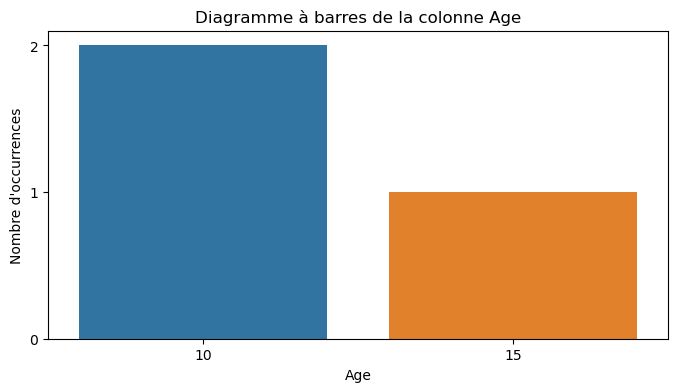

In [89]:
afficher_diagramme_batons(
    nom_tableau = patapouf, 
    nom_colonne = 'Age'
    )

### Diagramme Circulaire :
Un diagramme circulaire ressemble à une délicieuse tarte découpée en parts. Chaque part représente une partie d'un tout. Par exemple, si on veut montrer combien de temps les gens passent à dormir, manger, ou jouer, on peut utiliser un diagramme circulaire. La taille de chaque part nous montre quelle activité prend le plus de temps. C'est comme partager une tarte pour que chacun puisse voir à quel point chaque activité est importante.

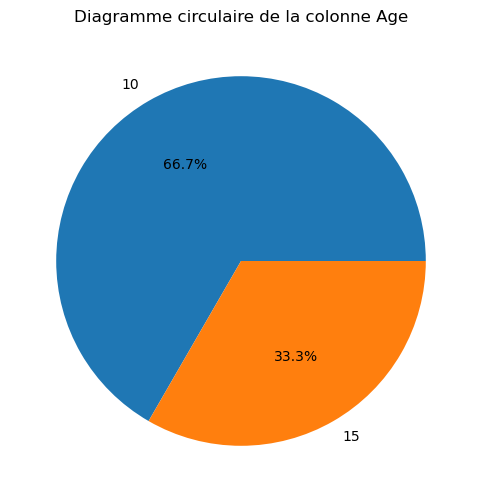

In [90]:
afficher_diagramme_circulaire(
    nom_tableau = patapouf, 
    nom_colonne = 'Age')

Tu peux t'amuser à afficher les types de diagrammes qui t'intéressent. N'oublie pas que lorsque tu veux créer une visualisation, il faut toujours donner le nom de ton tableau, pour le programme comprenne d'où est ce qu'il doit chercher ses informations.

In [ ]:
# Amuse toi à faire d'autres visualisations



## Maintenant, à toi de jouer ! 
Tu es à présent une "analyseuse de données". Discute avec les filles dans la classe pour créer ton propre tableau. Inspire-toi de ce qu'on a fait plus haut pour faire ton analyse.   
Les étapes à suivre sont les suivantes:  
1) Crée ton tableau avec le nom des filles autour de toi. Plus tu as de noms, mieux c'est ! Il faudra aussi que tu décides quelles informations tu aimerais leur demander. Par exemple, quel est leur animal préféré. 

In [91]:
# Crée ton tableau ici et n'oublie pas de l'afficher



2) Maintenant, pose leur les questions chacune à la fois, et modifie les valeurs à l'intérieur du tableau.

In [ ]:
# Modifie les valeurs du tableau en fonction des réponses des filles




3) A présent, tu peux t'amuser à faire les visualisations qui te plaisent !

In [92]:
# Affiche les données qui t'intéressent



Tu peux à présent faire des conclusions sur le groupe de filles avec toi en classe. Par exemple, tu remarques que la plupart des filles préfèrent l'hiver à l'été ou alors qu'il n'y a pas beaucoup de filles qui portent des lunettes. A toi de faire des conclusions selon tes résultats !

Bravo à toi ! Tu es à présent une vraie *Data scientist*